In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
# Verifică valorile lipsă
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Examinează distribuția etichetelor
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Crop_recommendation.csv')  

# Transformă coloana 'label' în valori numerice
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [16]:
def gini_index(y):
    class_counts = y.value_counts()
    probabilities = class_counts / len(y)
    gini = 1 - sum(probabilities**2)
    return gini
gini = gini_index(df['label'])
print(f'Indicele Gini pentru setul de date este: {gini}')

Indicele Gini pentru setul de date este: 0.9545454545454546


In [25]:
label_entropy = -sum(df['label'].value_counts(normalize=True) * np.log2(df['label'].value_counts(normalize=True)))
print("Entropy label':", label_entropy)
K_entropy = -sum(df['K'].value_counts(normalize=True) * np.log2(df['K'].value_counts(normalize=True)))
print("Entropy K':", K_entropy)
P_entropy = -sum(df['P'].value_counts(normalize=True) * np.log2(df['P'].value_counts(normalize=True)))
print("Entropy P':", P_entropy)
N_entropy = -sum(df['N'].value_counts(normalize=True) * np.log2(df['N'].value_counts(normalize=True)))
print("Entropy N':", N_entropy)
ph_entropy = -sum(df['ph'].value_counts(normalize=True) * np.log2(df['ph'].value_counts(normalize=True)))
print("Entropy ph':", ph_entropy)
humidity_entropy = -sum(df['humidity'].value_counts(normalize=True) * np.log2(df['humidity'].value_counts(normalize=True)))
print("Entropy humidity':", humidity_entropy)
temperature_entropy = -sum(df['temperature'].value_counts(normalize=True) * np.log2(df['temperature'].value_counts(normalize=True)))
print("Entropy temperature':", temperature_entropy)
rainfall_entropy = -sum(df['rainfall'].value_counts(normalize=True) * np.log2(df['rainfall'].value_counts(normalize=True)))
print("Entropy rainfall':", rainfall_entropy)


Entropy label': 4.459431618637295
Entropy K': 5.812815935039871
Entropy P': 6.560747386240556
Entropy N': 6.755148352882815
Entropy ph': 11.103287808412068
Entropy humidity': 11.103287808412068
Entropy temperature': 11.103287808412068
Entropy rainfall': 11.103287808412068


In [26]:
rainfall_entropy = -sum(df['rainfall'].value_counts(normalize=True) * np.log2(df['rainfall'].value_counts(normalize=True)))
print("Entropy rainfall':", rainfall_entropy)

Entropy rainfall': 11.103287808412068


In [27]:
label_entropy = -sum(df['label'].value_counts(normalize=True) * np.log2(df['label'].value_counts(normalize=True)))
print("Entropy label':", label_entropy)

Entropy label': 4.459431618637295


In [28]:
temperature_entropy = -sum(df['temperature'].value_counts(normalize=True) * np.log2(df['temperature'].value_counts(normalize=True)))
print("Entropy temperature':", temperature_entropy)

Entropy temperature': 11.103287808412068


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   
label       -0.031130 -0.491006 -0.346417     0.113606  0.193911 -0.012253   

             rainfall     label  
N            0.059020 -0.031130  
P           -0.063839 -0.491006  
K           -0.053461 -0.346417  
temperature -0.030084  0.113606  
humidity     0.094423  0.193911  
ph          -0.109069 -0.012253  
rainfall     1.000000  0.045611  
label        0.045611  1.

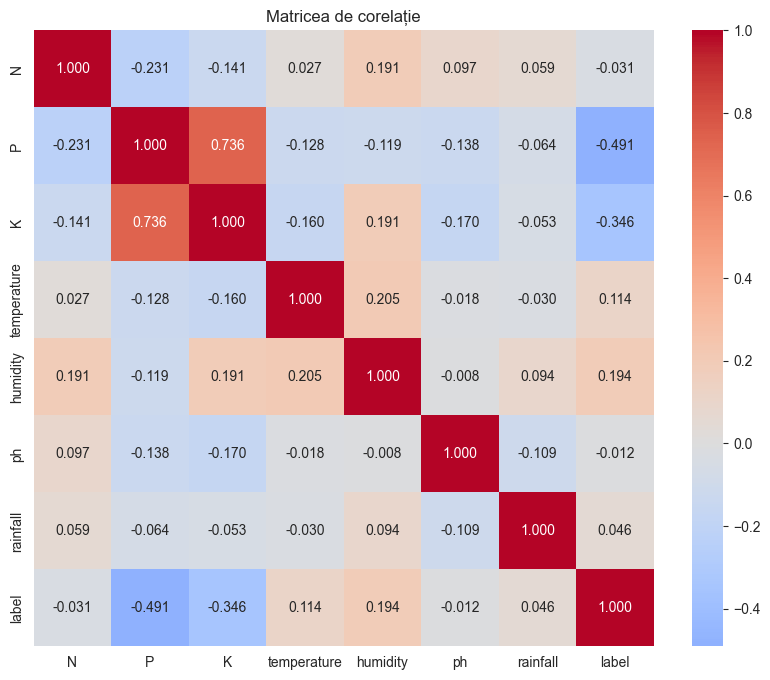

In [32]:
# Calculează matricea de corelație
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()

print(correlation_matrix)
# Vizualizare grafică a matricei de corelație
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,fmt='.3f')
plt.title('Matricea de corelație')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Separăm caracteristicile (X) și etichetele (y)
X = df.drop('label', axis=1)
y = df['label']

# Împărțim setul de date în seturi de antrenament și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler

# Inițializează scalatorul
scaler = StandardScaler()

# Ajustează și transformă seturile de antrenament și test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inițializează modelul
model = LogisticRegression()

# Antrenează modelul
model.fit(X_train, y_train)

# Prezice etichetele pentru setul de test
y_pred = model.predict(X_test)

# Evaluarea modelului
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))


Accuracy: 95.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.88      0.85      0.86        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.79      0.91      0.85        34
 kidneybeans       0.97      0.97      0.97        36
      lentil       0.81      0.95      0.88        22
       maize       1.00      0.96      0.98        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.97      0.94      0.96        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Inițializează modelele
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Antrenează și evaluează fiecare model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 99.24242424242425
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      1.00      0.93        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.0